# Analyze A/B Test Results


This projects demonstrates competency in the fundamental statistics and modeling techniques needed to explore Hypothesis Testing and A/B Tests using bootstrapping and regression covered in the "Practical Statistics" course in Udacity's Data Analyst Nanodegree.

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, I will be working to understand the results of an A/B test run by an e-commerce website.  

My goal is to work through this notebook to help the fictional company understand if they should, based on the conversion results of the two different pages, implement the new page or keep the old page.



<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [39]:
## Import basic packages.
import pandas as pd
import numpy as np
import random
import tabletext

## Import visualization packages.
import seaborn as sns
import matplotlib.pyplot as plt

## Set styling for visualizations.
%matplotlib inline
sns.set_style("white")
sns.set_style("ticks")
sns.set(rc={'figure.figsize':(16,10)})

## Set random seed.
random.seed(42)

### `1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

#### A. Read in the dataset and take a look at the top few rows here:

In [2]:
## Read in ab_data.csv, check head of data.
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


#### B. Use the below cell to find the number of rows in the dataset.

In [3]:
## Number of rows in df.
numRows = df.shape[0]

## Build table.
list_ = [['Number of Rows', numRows]]

## Print table.
print(tabletext.to_text(list_))

┌────────────────┬────────┐
│ Number of Rows │ 294478 │
└────────────────┴────────┘


#### C. The number of unique users in the dataset.

In [4]:
## Unique values in column user_id.
users = df.user_id.nunique()

## Build table.
list_ = [['Number of Unique Users', users]]

## Print table.
print(tabletext.to_text(list_))

┌────────────────────────┬────────┐
│ Number of Unique Users │ 290584 │
└────────────────────────┴────────┘


#### D. The proportion of users converted.

In [5]:
## Number of users that converted.
conversion = df.converted.mean()

## Build table.
list_ = [['Percent of Users that Converted', conversion]]

## Print table.
print(tabletext.to_text(list_))

┌─────────────────────────────────┬─────────────────────┐
│ Percent of Users that Converted │ 0.11965919355605512 │
└─────────────────────────────────┴─────────────────────┘


#### E. The number of times the `new_page` and `treatment` don't line up.

In [6]:
## Query records where group and landing page do not match.
errorRows = df.query("(group == 'control' and landing_page == 'new_page') or (group == 'treatment' and landing_page == 'old_page')").shape[0] 

## Build table.
list_ = [['Number of Rows with Errors', errorRows],
         ['% of Records with Errors', errorRows / numRows]]

## Print table.
print(tabletext.to_text(list_))

┌────────────────────────────┬──────────────────────┐
│ Number of Rows with Errors │                 3893 │
├────────────────────────────┼──────────────────────┤
│ % of Records with Errors   │ 0.013220002852505111 │
└────────────────────────────┴──────────────────────┘


#### F. Do any of the rows have missing values?

In [7]:
## Method one of checking missing values.
df.info()

## Method two of checking missing values.
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### `2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Handle these rows.

#### A. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
## Drop mismatching rows.
df2 = df.query("(group == 'control' and landing_page == 'old_page') or (group == 'treatment' and landing_page == 'new_page')")


In [9]:
## Double Check all error rows were removed.
treatmentErrorsCheck = df2[((df2.group == 'treatment') == (df2.landing_page == 'new_page')) == False].shape[0]
controlErrorsCheck = df2[((df2.group == 'control') == (df2.landing_page == 'old_page')) == False].shape[0]

## Build table.
list_ = [['Quality Check'],
         ['df rows',len(df)],
         ['df2 rows',len(df2)],
         ['df2 Treatment Rows with Errors', treatmentErrorsCheck],
         ['df2 Control Rows with Errors', controlErrorsCheck]]

## Print table.
print(tabletext.to_text(list_))

┌────────────────────────────────┬────────┐
│ Quality Check                  │        │
├────────────────────────────────┼────────┤
│ df rows                        │ 294478 │
├────────────────────────────────┼────────┤
│ df2 rows                       │ 290585 │
├────────────────────────────────┼────────┤
│ df2 Treatment Rows with Errors │      0 │
├────────────────────────────────┼────────┤
│ df2 Control Rows with Errors   │      0 │
└────────────────────────────────┴────────┘


### `3.` Use **df2** and the cells below to answer the questions below.

#### A. How many unique **user_id**s are in **df2**?

In [10]:
## Print number of unique user ids.
users = df2.user_id.nunique()

## Build table.
list_ = [['Number of Unique Users', users]]

## Print table.
print(tabletext.to_text(list_))

┌────────────────────────┬────────┐
│ Number of Unique Users │ 290584 │
└────────────────────────┴────────┘


#### B. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
## Find duplicated user_id.
dupe = df2[df2.duplicated(['user_id'])].user_id.unique()[0]

## Build table.
list_ = [['Duplicated User ID', dupe]]

## Print table.
print(tabletext.to_text(list_))

┌────────────────────┬────────┐
│ Duplicated User ID │ 773192 │
└────────────────────┴────────┘


#### C. What is the row information for the repeat **user_id**? 

In [12]:
## Find row values for duplicated user_id.
df2[df2.duplicated(['user_id'],keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


#### D. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
## Since the user has not yet converted, I am keeping the last record, and dropping the first.
df2 = df2.drop_duplicates(['user_id'], keep='last')

## Check to verify duplicate removed.
dupe = df2[df2.duplicated(['user_id'])].user_id.nunique()

## Buid table.
list_ = [['Number of Duplicated Users', dupe]]

## Print table.
print(tabletext.to_text(list_))

┌────────────────────────────┬───┐
│ Number of Duplicated Users │ 0 │
└────────────────────────────┴───┘


### `4.` Use **df2** in the below cells to answer the below questions.

#### A. What is the probability of an individual converting regardless of the page they receive?

In [14]:
## Conversion mean, control and treatment.
convertMean = df2.converted.mean()

## Build table.
list_ = [['Conversion (Both)', convertMean]]

## Print table.
print(tabletext.to_text(list_))

┌───────────────────┬─────────────────────┐
│ Conversion (Both) │ 0.11959708724499628 │
└───────────────────┴─────────────────────┘


#### B. Given that an individual was in the `control` group, what is the probability they converted?*

In [15]:
## Conversion mean, control.
controlConvert = df2[df2.group == 'control'].converted.mean()

## Build table.
list_ = [['Conversion (Control)', controlConvert]]

## Print table.
print(tabletext.to_text(list_))

┌──────────────────────┬────────────────────┐
│ Conversion (Control) │ 0.1203863045004612 │
└──────────────────────┴────────────────────┘


#### C. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
## Conversion mean, treatment
treatmentConvert = df2[df2.group == 'treatment'].converted.mean()

## Build table.
list_ = [['Conversion (Treatment)', treatmentConvert]]

## Print table.
print(tabletext.to_text(list_))

┌────────────────────────┬─────────────────────┐
│ Conversion (Treatment) │ 0.11880806551510564 │
└────────────────────────┴─────────────────────┘


#### D. What is the probability that an individual received the new page?

In [17]:
## Percentage of learners who landed on the Treatment page.
newPageProb = len(df2.query("landing_page == 'new_page'")) / df2.shape[0]

## Build table.
list_ = [['Pr(Treatment)', newPageProb]]

## Print table.
print(tabletext.to_text(list_))

┌───────────────┬────────────────────┐
│ Pr(Treatment) │ 0.5000619442226688 │
└───────────────┴────────────────────┘


#### E. Consider your results from A - D above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

While the Control experience seems to have fared slightly better, <font color='red'>**there is not yet enough evidence to say this is statistically significant**</font>. More sampling is needed to understand if the difference in means here is indicative of the performance of the pages. Using bootstrapping, we can simulated *n* number of tests using this data and create a sample of difference of means by which we can compare this result.

**Note:** While there is a chance the results may still be statistically significant, my first reaction is that I am skeptical the results will be *practically* significant. In other words, the results may be so close, that there will be no perceivable gain (or loss) to the conversion rate on the page in either version A or version B.

Below is a table of some of the key metrics discovered in Part I.

| Measure | Value   |
|------|------|
|   Conversion (Both)  | 11.959%|
|   Conversion (Control)  | 12.039%|
|   Conversion (Treatment)  | 11.881%|
|   Difference in Means  | -0.158%|

<a id='ab_test'></a>
## Part II - A/B Test

### `1.` Using the data provided,  what should your null and alternative hypotheses be? 


\begin{equation*}H_0: p_{new} - p_{old} <= 0\end{equation*}
\begin{equation*}H_1: p_{new} - p_{old} > 0\end{equation*}

### `2.` Assume that $p_{new}$ and $p_{old}$ are equal under the null. Furthermore, assume they are equal to the **converted** rate for all data in **ab_data.csv**. Using **ab_data.csv**, Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of the null hypothesis.

#### A. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
p_new = df2.converted.mean()

## Build table.
list_ = [['P_new (Null)', p_new]]

## Print table.
print(tabletext.to_text(list_))

┌──────────────┬─────────────────────┐
│ P_new (Null) │ 0.11959708724499628 │
└──────────────┴─────────────────────┘


#### B. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
p_old = df2.converted.mean()

## Build table.
list_ = [['P_old (Null)', p_old]]

## Print table.
print(tabletext.to_text(list_))

┌──────────────┬─────────────────────┐
│ P_old (Null) │ 0.11959708724499628 │
└──────────────┴─────────────────────┘


#### C. What is $n_{new}$?

In [20]:
n_new = df2[df2.landing_page == 'new_page'].shape[0]

## Build table.
list_ = [['N_new', n_new]]

## Print table.
print(tabletext.to_text(list_))

┌───────┬────────┐
│ N_new │ 145310 │
└───────┴────────┘


#### D. What is $n_{old}$?

In [21]:
n_old = df2[df2.landing_page == 'old_page'].shape[0]

## Build table.
list_ = [['N_old', n_old]]

## Print table.
print(tabletext.to_text(list_))

┌───────┬────────┐
│ N_old │ 145274 │
└───────┴────────┘


#### E. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.choice([0, 1], size=n_new, p=[(1 - p_new), p_new])

#### F. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice([0, 1], size=n_new, p=[(1 - p_old), p_old])

#### G. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
## Calculate difference of means.
new_mean = new_page_converted.mean()
old_mean = old_page_converted.mean()
diff = new_page_converted.mean() - old_page_converted.mean()

## Build table.
list_ = [['New_Mean', new_mean],
         ['Old_Mean', old_mean],
         ['Diff of Means', diff]]

## Print table.
print(tabletext.to_text(list_))

┌───────────────┬────────────────────────┐
│ New_Mean      │    0.11913151193999036 │
├───────────────┼────────────────────────┤
│ Old_Mean      │    0.11988851421099718 │
├───────────────┼────────────────────────┤
│ Diff of Means │ -0.0007570022710068208 │
└───────────────┴────────────────────────┘


#### H. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
## Save list for capturing bootstrap results.
p_diffs = []

'''
For loop to create bootstrap means under the new experience, the 
old experience, and create a difference of means. This will allow us
to create a set of synthetic experiment results to generate the spread
of data that would exist under the null hypothesis.
'''

for _ in range(10000):
    new = np.random.choice([0, 1], size=n_new, p=[(1 - p_new), p_new])
    old = np.random.choice([0, 1], size=n_old, p=[(1 - p_old), p_old])
    diff = new.mean() - old.mean()
    p_diffs.append(diff)

    
## Convert p_diffs into numpy array for histogram purposes.
p_diffs = np.array(p_diffs)

#### I. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

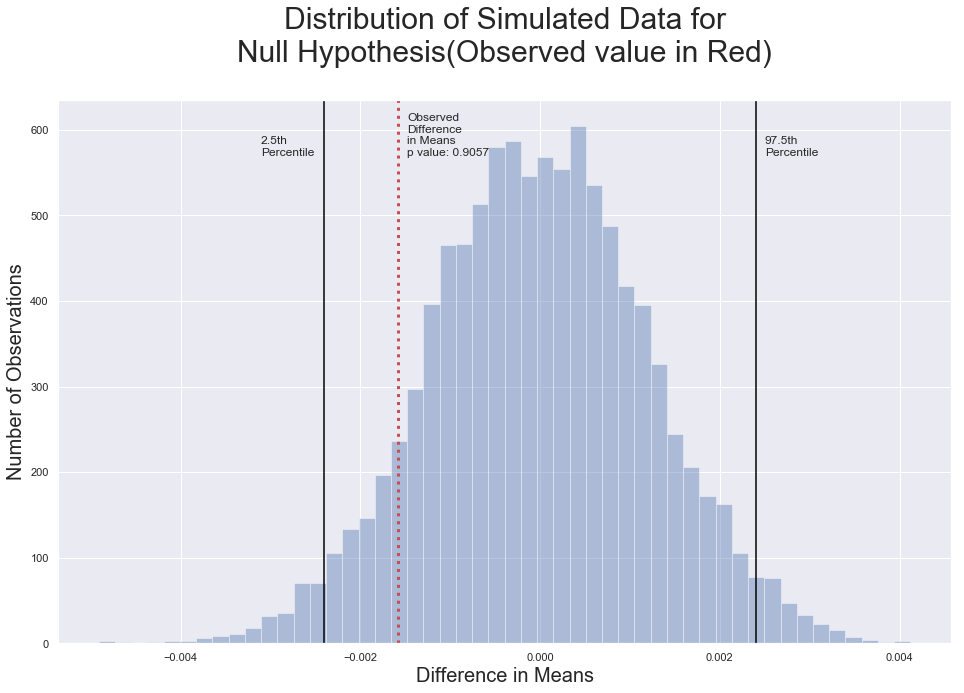

In [44]:
'''
Create variable obs_diff from observed data This will be 
used for plotting, and will be used to generate the p value.
'''

obs_diff = treatmentConvert - controlConvert


## Plot seaborn histogram.
sns.distplot(p_diffs, kde=False, rug=False)

## Plot the observed difference in means against the simulated null hypothesis data. Write p value.
plt.axvline(obs_diff, lw = 3, ls =':', c= 'r', label='Observed Difference in Mean')
plt.text(obs_diff + 0.0001,570,'Observed\nDifference\nin Means\np value: ' + str((p_diffs > obs_diff).mean()),rotation=0)

## Plot confidence intervals.
low, high = np.percentile(p_diffs, 2.5), np.percentile(p_diffs, 97.5)

plt.axvline(low, c='black')
plt.text(low - .0007, 570, "2.5th\nPercentile")

plt.axvline(high, c='black')
plt.text (high + .0001, 570, "97.5th\nPercentile")

## Format plot.
plt.title("Distribution of Simulated Data for\nNull Hypothesis(Observed value in Red)\n", fontsize = 30)
plt.xlabel('Difference in Means', fontsize = 20)
plt.ylabel('Number of Observations', fontsize = 20)

## Show plot.
plt.show()

#### J. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
## Calculate P value.
p_value = (p_diffs > obs_diff).mean()

## Build table.
list_ = [['P-value', p_value]]

## Print table.
print(tabletext.to_text(list_))

┌─────────┬────────┐
│ P-value │ 0.9057 │
└─────────┴────────┘


#### K. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The P-value is the probability that the observed difference of means, <code>obs_diff</code>, occurred under the Null Hypothesis. Put another way: based on the results, there is a 90.57% chance that the observed difference we saw from the A/B test could have occurred under the null hypothesis (as a reminder: the null hypothesis is that the treatment page, at best, only performs *the same* as the control page).

Based on this, if I were to stop this analysis right here, I would claim that I had failed to reject the Null hypothesis.

#### L. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm

## Number of conversions by each experience.
convert_old = df2.query('group == "control" & converted == 1').shape[0]
convert_new = df2.query('group == "treatment" & converted == 1').shape[0]

## Number of records for each experience.
n_old = df2[df2.group == 'control'].shape[0]
n_new = df2[df2.group == 'treatment'].shape[0]

#### M. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [29]:
## Generate z_score, p_value.
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

## Build table.
list_ = [['Z-Score', z_score],
         ['P-Value', p_value]]

## Print table.
print(tabletext.to_text(list_))

┌─────────┬────────────────────┐
│ Z-Score │ 1.3109241984234394 │
├─────────┼────────────────────┤
│ P-Value │ 0.9050583127590245 │
└─────────┴────────────────────┘


#### N. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The Z-score speaks to how many standard deviations an element is from the mean. Our  Z-Score, 1.3109, is below the critical value of 1.6448. Similar to the bootstrapping, the P-value .905, far above the alpha of .05. Therefore, I continue to fail to reject the Null Hypothesis.

<a id='regression'></a>
## Part III - A regression approach

### `1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.

#### A. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression should be used here, as it is better fit to measure the classification of two binary potential outcomes.

#### B. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [30]:
## Create new columns to prepare the dataframe for modeling.
df2['intercept'] = 1
df2[['ab_page', 'old_page']] = pd.get_dummies(df2['landing_page'])

## Check results.
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


#### c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [31]:
## Create Logistic Regression model, fit it to the results.
logit = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
result = logit.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


#### D. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [32]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 22 Jul 2019   Pseudo R-squ.:               8.077e-06
Time:                        16:49:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007


#### E. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The P-value for the regression model is .190. The reason for the difference between the regression model and the bootstrapping P-values is because these were two different styles of test. The bootstrapping was a single-tailed test, whereas the regression model was a two-tailed test. Put mathematially:

*Bootstrap Hypotheses*

\begin{equation*}H_0: p_{new} - p_{old} <= 0\end{equation*}
\begin{equation*}H_1: p_{new} - p_{old} > 0\end{equation*}

*Regression Hypotheses*

\begin{equation*}H_0: p_{new} = p_{old}\end{equation*}
\begin{equation*}H_1: p_{new} \ne p_{old}\end{equation*}


#### F. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Finding more terms to add to the model is worth pursuing in the search for predictors that can help account for some of the current unexplained variability. However, this must be done with caution to avoid multicollinearity. If multiple predictors are being added in that correlate with each other, this can cause the beta coefficients that build the model to perform in unexpected ways that affects the interpretability, accuracy, and overall usefulness of the model.

#### G. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows. Does it appear that country had an impact on conversion?

In [33]:
## Read in countries.csv, join data.
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

## See how many country values are in the dataset.
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [34]:
## Create the necessary dummy variables.
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])


## Check data for accurate dummy creation.
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0


#### H. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  Provide the summary results, and your conclusions based on the results.

In [35]:
## Fit Your Linear Model And Obtain the Results
Logit = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','UK','US']])
result = Logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 22 Jul 2019   Pseudo R-squ.:               2.323e-05
Time:                        16:49:45   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.

Looking at Logistic regression model with countries adding in (UK, US, and CA as the baseline). We do not see a statistically significant difference in how learners react to the pages in different countries when controlling for experience. Now, let's add in a couple higher order terms by creating an interaction between country and ab_page.

In [36]:
## Create new higher order columns.
df_new['ab_page_UK'] = df_new.ab_page * df_new.UK
df_new['ab_page_US'] = df_new.ab_page * df_new.US

## Recreate the Logistic regression model with the higher order terms.
Logit = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','UK','US', 'ab_page_UK', 'ab_page_US']])
result = Logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 22 Jul 2019   Pseudo R-squ.:               3.482e-05
Time:                        16:49:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.

When adding in the higher order terms, the results become muddier. The P-Values are far above the alpha. Because of this, is does not seem that any higher order interactions between a user's country and their A/B experience will improve the accuracy of our model.

<a id='conclusions'></a>
## Conclusions

There are two questions that must be answered here: what is the **statistical** relevance of the results, and what is the **practical** relevance?

Statistically, we've seen by way of bootstrap analysis and logistic regression that there is no currently available evidence of statistically significant differences between how the Treatment and Control pages perform. In the bootstrap analysis, are observed difference showed a P-value of .905; put another way, there is greater than a 90% chance that our observed data could have occurred under the null hypothesis. In the Logistic regression, we were unable to find features with meaningful P-value relationships between the feature and the conversion outcome.

Practically, the observed difference is quite small. We see this most clearly when we use bootstrap to calculate 10,000 experiment's worth of difference of means and plot them on a histogram. Under the null hypothesis, more than 95 percent of the results are plus or minus .003 (three thousandths) from 0; since the P-value of the observed difference is .905, it suggest that are distribution of results if we ran 10,000 real experiments would look very similar to this. An A/B Test should be driving noticeable boosts in performance to conversions -- this is not the case here. It would be unwise to commit engineering resources to rolling out a solution like this, as opposed to rededicating them to another experiment testing new features.

Because of this, the results of this experiment show that the boost in performance from the A/B test is neither statistical nor practical, and should be abandoned in pursuit of other A/B tests. I fail to reject the null hypothesis.